<h1 style="color:black" align="center">Центральная предельная теорема</h1>

### Полезные сслыки:

1. <a href='https://habr.com/ru/post/471198/'>Пример с использованием экспоненциального распределения</a>
2. <a href='https://habr.com/ru/post/331560/'>Подбор закона распределения случайной величины</a>
3. <a href='https://numpy.org/doc/stable/reference/random/generated/numpy.random.laplace.html'>Документация Numpy numpy.random.laplace</a>

4. <a href='https://ru.wikipedia.org/wiki/Распределение_Лапласа'>Распределение Лапласа</a>

<h2 style="color:#008B8B" align="center">Распределение Лапласа</h2>

Для проведения эксперимента нам потребуется выбрать распределение, из которого случайным образом будет формироваться выборка. В нашем случае мы воспользуемся распределением Лапласа.

**Плотность вероятности** $\large {\displaystyle {\frac {\alpha }{2}}\,e^{-\alpha |x-\beta |}}$, где

$\large \textstyle\alpha>0$ — коэффициент масштаба. Коэффициент масштаба — это параметр вероятностного распределения. Физически конкретное значение данного параметра может быть связано с выбором шкалы измерения.


$\large \beta\in\mathbb{R}$ — коэффициент сдвига. Коэффициент сдвига — это параметр вероятностного распределения, имеющий специальный вид. Физически конкретное значение данного параметра может быть связано с выбором точки отсчёта шкалы измерения.

**Носитель** $\displaystyle x\in (-\infty ;\infty )$

**Математическое ожидание** равно $\large \beta$

**Дисперсия** равна $\large \frac{2}{\alpha^2}$

Остальную информацию можно найти на <a href='https://ru.wikipedia.org/wiki/Распределение_Лапласа'>википедии</a>.

### Подключение библиотек

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize'] = 8, 6

<h2 style="color:#008B8B" align="center">Построение гистограммы распределения</h2>

 Сгенерируйте из него выборку объёма $1000$, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

In [2]:
# Формирование выборки
loc = 0.  # Коэффициент сдвига betta
scale = 1.  # Коэффициент масштаба lambda

sample = np.random.laplace(loc, scale, 1000)

# Расчёт теоритического распределения
x = np.arange(-10., 10., .01)
pdf = scale/2 * np.e**(-scale * abs(x - loc))

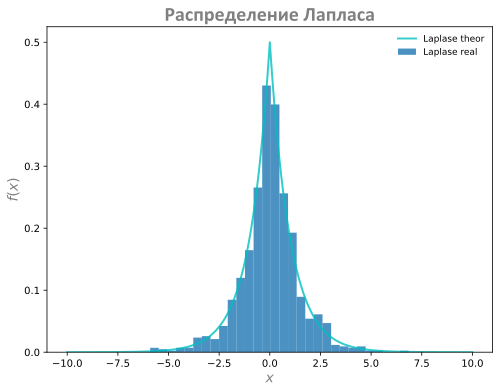

In [3]:
title_dict = {'fontsize': 20, 'fontweight': 'bold', 'color': '#808080', 'family': 'Calibri'}
lable_dict = {'fontsize': '14', 'color': '#808080', 'family': 'Calibri'}

plt.hist(sample, bins=30, density=True, alpha=0.8, label='Laplase real')
plt.plot(x, pdf, 'c-', alpha=0.8, lw=2, label='Laplase theor')

plt.title('Распределение Лапласа', fontdict=title_dict)
plt.xlabel('$x$', fontdict=lable_dict)
plt.ylabel('$f(x)$', fontdict=lable_dict)

plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.show()

<h2 style="color:#008B8B" align="center">Отображение выборочных средних</h2>

Отобразим то, как выглядят выборочные средние. Этот момент позволяет оценить то, насколько хорошо выборочные срдение описывают генеральную совокупность.

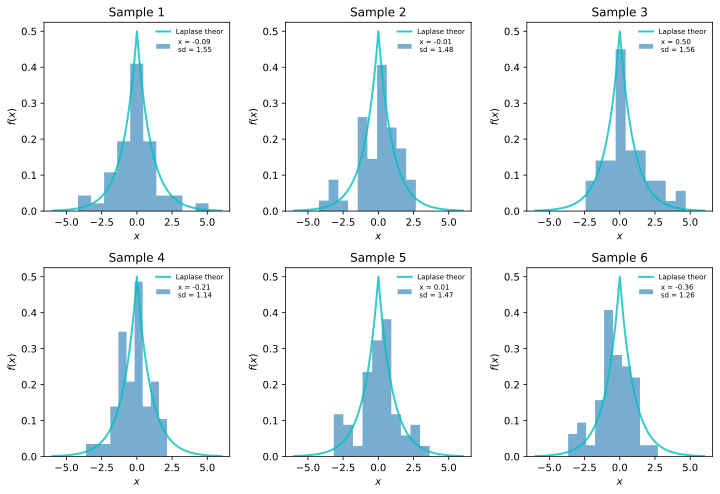

In [4]:
# Создаём 1000 выборок по 50 наблюдений в каждой
selections = np.random.choice(sample, (1000, 50))

#  Создаем "Figure" и "Axes":
fig, axes = plt.subplots(nrows = 2, ncols = 3)

# Выпрямляем axes, для удобного обращения
axes = axes.flatten()

# Проходим циклом по кажой выборке
for number_axes, selection in enumerate(selections):
    
    if number_axes < 6: # Строим первые 6 графиков
        
        # Расчёт теоритического распределения
        x = np.arange(-6., 6., .01)
        pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
        axes[number_axes].plot(x, pdf, 'c-', alpha=0.8, lw=2, label='Laplase theor')
        
        # Строим гистограмму
        axes[number_axes].hist(selection, density=True, histtype='stepfilled', alpha=0.6, label = f' x = {selection.mean():.2f} \n sd = {selection.std():.2f}')

        # Настройка легенды
        axes[number_axes].legend(loc='upper right', fontsize=7, frameon=False)

        # Добавление подписей
        axes[number_axes].set(title = f'Sample {number_axes + 1}')
        axes[number_axes].set(xlabel = '$x$')
        axes[number_axes].set(ylabel = '$f(x)$')

        # Задаём значение ширины и высоты фигуры в дюймах
        fig.set_size_inches(12, 8)

        # Увеличение ширины фигуры 
        # 0.3 - это не дюймы, а доля от среднего значения горизонтальных осей графиков
        # wspace - начинаится с буквы W, так как это сокращение от width (Ширина) Отвечает за растояние между графиками по горизонатли
        plt.subplots_adjust(wspace=0.3, hspace=0.30)
    
plt.show()

<h2 style="color:#008B8B" align="center">Построение распределения выборочных средних</h2>

### Расчёт параметров

**Математическое ожидание** равно $\beta$ (коэффициент сдвига), который имеет значение равное $0$.

**Дисперсия** равна $\frac{2}{\alpha^2}$, где $\alpha = 1$ представляет собой коэффициент масштаба. Получаем:

$D = \large \frac{2}{\alpha^2} = \frac{2}{1^2} = 2$

**Среднеквадратичное отклонение** 

$\large \sigma = \sqrt{D} = \sqrt{2}$

**Стандартная ошибка среднего**

$\large SE = \frac{\sigma}{\sqrt{n}}$

### Определение функций

**Функция формирования выборочных средних**

In [5]:
def creat_samples(loc, scale, size=30, count_samples=1000):
    samples = np.array([])
    
    for i in range(count_samples):
        samples = np.append(samples, np.random.laplace(loc, scale, size).mean())
    return samples

**Функция построения графика выборочных средних**

In [6]:
def plot_hist(sigma, mu, size, count_samples, loc=0., scale=1.):
    SE = sigma / math.sqrt(size)
    
    # Формирование выборок из распределения Лапласа определённого размера
    means_samples = creat_samples(loc=loc, scale=scale, size=size, count_samples=count_samples)
    # Построение гистограммы выборочных средних
    plt.hist(means_samples, density=True, color='#30ba8f',label = f' mean of x = {means_samples.mean():.5f} \n sd of x (SE) = {means_samples.std():.5f}')
    
    plt.title('Распределение выборочных средних', fontdict=title_dict)
    plt.xlabel('$x$', fontdict=lable_dict)
    plt.ylabel('$f(x)$', fontdict=lable_dict)
    
    # Расчёт теоритического нормального распределения
    x = np.arange(-1.5, 1.5, .0001)
    norm_rv = stats.norm(mu, SE)
    # Построение теоретического нормального распределения
    plt.plot(x,norm_rv.pdf(x),label='Norm theor')
    
    plt.legend(loc='upper right', fontsize=9, frameon=False)

### При числе элементов в выборке равное 10

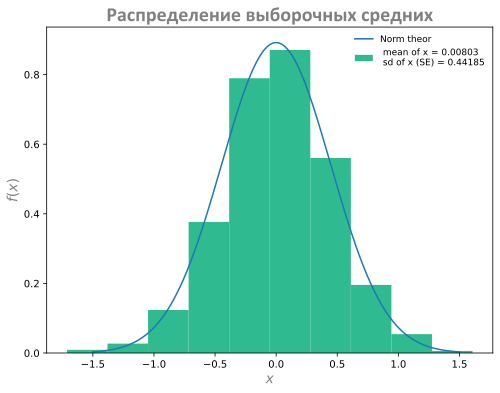

In [7]:
D, mu = 2, 0
sigma = math.sqrt(2)
plot_hist(sigma, mu, 10, 1000)

Если внутри каждой из выборок оценка реального показателя может быть не столь точной, то в среднем выборочные средние значения предоставят хороший показатель и среднее всех средних будет очень близко к среднему в ГС. На гистограмме мы видим, что большенство всех наших выборочных средних лежат рядом с нулём и какие-то отклоняются в положительную сторону и в отрицательную.

Стандартное отклонение данного распределения называется **стандартной ошибкой среднего** и показывает на сколько в среднем выборочные значения отклоняются от среднего ГС (от среднего средних, так как оно имеет близкое значение к ГС, можно считать среднее средних - средним ГС).

### При числе элементов в выборке равное 30

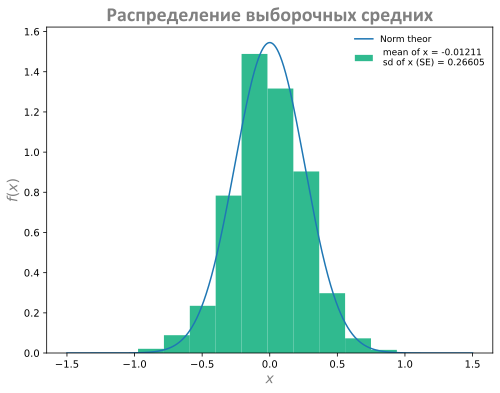

In [8]:
plot_hist(sigma, mu, 30, 1000)

### При числе элементов в выборке равное 100

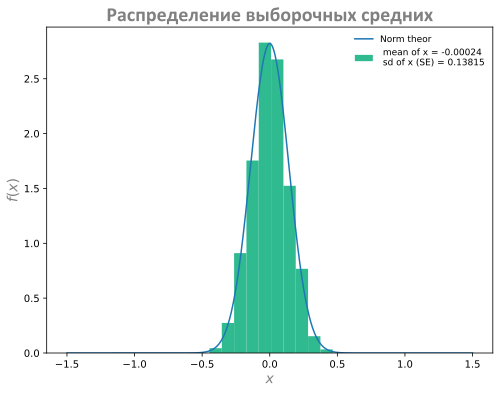

In [9]:
plot_hist(sigma, mu, 100, 1000)

**Что если увеличить объём каждой из выборок?**
Распределение признака в выборках станет напоминать картину из ГС (гистограмма с шестью выборками). Выборочные оценки станут тоже более точными. Если мы посмотрим на выборочное распределение средних значений (зелёные гистограммы выше), то стандартная ошибка уменьшится, так как большинство всех выборочных наблюдений будут лежать близко с реальным показателем (средним ГС).